In [21]:
import os

# مسیر داده‌ها
train_images_path = r"C:\Users\faran\OneDrive\Desktop\Task02_Heart\imagesTr"
train_labels_path = r"C:\Users\faran\OneDrive\Desktop\Task02_Heart\labelsTr"

# بررسی وجود پوشه‌ها
if not os.path.exists(train_images_path) or not os.path.exists(train_labels_path):
    raise FileNotFoundError(" مسیر پوشه داده‌ها اشتباه است. بررسی کن که مسیر درست باشد.")

# لیست فایل‌های NIfTI
train_image_files = sorted([f for f in os.listdir(train_images_path) if f.endswith(".nii") or f.endswith(".nii.gz")])
train_label_files = sorted([f for f in os.listdir(train_labels_path) if f.endswith(".nii") or f.endswith(".nii.gz")])

# بررسی اینکه تعداد تصاویر و ماسک‌ها برابر باشند
assert len(train_image_files) == len(train_label_files), " تعداد تصاویر و ماسک‌ها برابر نیست!"

# نمایش ۵ فایل اول
print("✅ لیست ۵ فایل اول از تصاویر:")
print(train_image_files[:5])

print("\n✅ لیست ۵ فایل اول از ماسک‌ها:")
print(train_label_files[:5])


✅ لیست ۵ فایل اول از تصاویر:
['la_003.nii', 'la_003.nii.gz', 'la_004.nii', 'la_004.nii.gz', 'la_005.nii']

✅ لیست ۵ فایل اول از ماسک‌ها:
['la_003.nii', 'la_003.nii.gz', 'la_004.nii', 'la_004.nii.gz', 'la_005.nii']


In [23]:
print(f" تعداد فایل‌های تصویر در imagesTr: {len(train_image_files)}")
print(f" تعداد فایل‌های ماسک در labelsTr: {len(train_label_files)}")


 تعداد فایل‌های تصویر در imagesTr: 40
 تعداد فایل‌های ماسک در labelsTr: 40


In [24]:
# تبدیل لیست به مجموعه (set) برای مقایسه راحت‌تر
image_set = set(train_image_files)
label_set = set(train_label_files)

# پیدا کردن فایل‌های اضافی در `labelsTr`
extra_labels = label_set - image_set

print(" فایل‌های اضافی در labelsTr:")
print(extra_labels)


 فایل‌های اضافی در labelsTr:
set()


In [25]:
import os

extra_file_path = os.path.join(train_labels_path, "._la_014.nii.gz")

# بررسی اینکه آیا فایل واقعاً وجود دارد و سپس حذف آن
if os.path.exists(extra_file_path):
    os.remove(extra_file_path)
    print(f" فایل اضافی {extra_file_path} حذف شد!")
else:
    print(" فایل اضافی دیگر وجود ندارد، احتمالاً قبلاً حذف شده است.")


 فایل اضافی دیگر وجود ندارد، احتمالاً قبلاً حذف شده است.


In [26]:
import os

# حذف فایل‌های مخفی از هر دو پوشه
for folder in [train_images_path, train_labels_path]:
    for file in os.listdir(folder):
        if file.startswith("._"):  # فایل‌هایی که با `._` شروع می‌شوند را حذف کن
            file_path = os.path.join(folder, file)
            os.remove(file_path)
            print(f" فایل {file} حذف شد.")

print(" تمامی فایل‌های مخفی `._` حذف شدند! حالا باید تعداد فایل‌ها برابر باشد.")


 تمامی فایل‌های مخفی `._` حذف شدند! حالا باید تعداد فایل‌ها برابر باشد.


In [27]:
# دوباره لیست فایل‌ها را می‌گیریم
train_image_files = sorted([f for f in os.listdir(train_images_path) if f.endswith(".nii") or f.endswith(".nii.gz")])
train_label_files = sorted([f for f in os.listdir(train_labels_path) if f.endswith(".nii") or f.endswith(".nii.gz")])

print(f" تعداد فایل‌های تصویر در imagesTr: {len(train_image_files)}")
print(f" تعداد فایل‌های ماسک در labelsTr: {len(train_label_files)}")

# بررسی اینکه تعداد برابر شده یا نه
assert len(train_image_files) == len(train_label_files), "🚨 هنوز تعداد فایل‌های تصویر و ماسک برابر نیست!"
print(" تعداد فایل‌های تصویر و ماسک برابر است. آماده‌ی پردازش داده‌ها هستیم!")


 تعداد فایل‌های تصویر در imagesTr: 40
 تعداد فایل‌های ماسک در labelsTr: 40
 تعداد فایل‌های تصویر و ماسک برابر است. آماده‌ی پردازش داده‌ها هستیم!


In [28]:
import nibabel as nib
import cv2
import numpy as np

X_train = []
Y_train = []

for img_file, label_file in zip(train_image_files, train_label_files):
    img_path = os.path.join(train_images_path, img_file)
    label_path = os.path.join(train_labels_path, label_file)

    try:
        img_nifti = nib.load(img_path).get_fdata()
        label_nifti = nib.load(label_path).get_fdata()
        
        # انتخاب اسلایس وسط (چون داده‌ها 3 بعدی هستند)
        img_nifti = np.squeeze(img_nifti[:, :, img_nifti.shape[-1] // 2])
        label_nifti = np.squeeze(label_nifti[:, :, label_nifti.shape[-1] // 2])  

        # نرمال‌سازی تصاویر (مقدار بین 0 و 1)
        img_nifti = (img_nifti - np.min(img_nifti)) / (np.max(img_nifti) - np.min(img_nifti))
        
        # تغییر اندازه به 256x256
        img_nifti = cv2.resize(img_nifti, (256, 256))
        label_nifti = cv2.resize(label_nifti, (256, 256), interpolation=cv2.INTER_NEAREST)

        X_train.append(img_nifti.reshape(256, 256, 1))
        Y_train.append(label_nifti.reshape(256, 256, 1))

    except Exception as e:
        print(f" خطا در پردازش فایل: {img_file} - {e}")

# تبدیل به آرایه NumPy
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(f" داده‌های Train پردازش شدند: {X_train.shape}, {Y_train.shape}")


 داده‌های Train پردازش شدند: (40, 256, 256, 1), (40, 256, 256, 1)


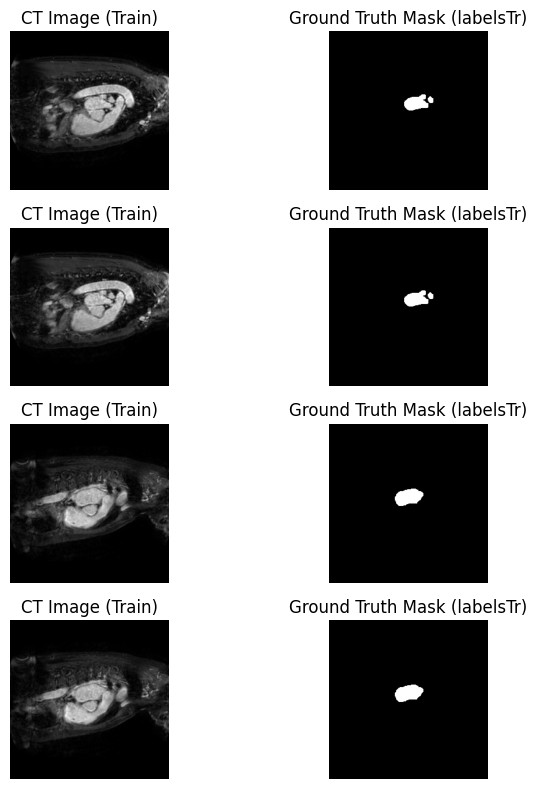

In [9]:
import matplotlib.pyplot as plt

# تعداد نمونه‌هایی که نمایش می‌دهیم
num_samples = 4  

# نمایش تصاویر و ماسک‌های `Train`
fig, axes = plt.subplots(num_samples, 2, figsize=(8, 8))

for i in range(num_samples):
    axes[i, 0].imshow(X_train[i, :, :, 0], cmap="gray")
    axes[i, 0].set_title("CT Image (Train)")
    axes[i, 0].axis("off")
    
    axes[i, 1].imshow(Y_train[i, :, :, 0], cmap="gray")
    axes[i, 1].set_title("Ground Truth Mask (labelsTr)")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


In [29]:
import albumentations as A

# تعریف عملیات افزایش داده‌ها
augment = A.Compose([
    A.HorizontalFlip(p=0.5),  # چرخش افقی با احتمال 50%
    A.VerticalFlip(p=0.5),    # چرخش عمودی با احتمال 50%
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=15, p=0.7),  # تغییر مقیاس، چرخش و جابه‌جایی
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)  # تغییر روشنایی و کنتراست
])

# لیست جدید برای داده‌های افزوده‌شده
augmented_images = []
augmented_masks = []

# اعمال Augmentation روی تصاویر و ماسک‌ها
for i in range(len(X_train)):
    for _ in range(2):  # دو نسخه جدید از هر تصویر ایجاد می‌کنیم
        augmented = augment(image=X_train[i, :, :, 0], mask=Y_train[i, :, :, 0])
        augmented_images.append(augmented["image"].reshape(256, 256, 1))
        augmented_masks.append(augmented["mask"].reshape(256, 256, 1))

# تبدیل به آرایه‌های NumPy
X_train_aug = np.array(augmented_images)
Y_train_aug = np.array(augmented_masks)

# ترکیب داده‌های اصلی و داده‌های افزوده‌شده
X_train_final = np.concatenate((X_train, X_train_aug), axis=0)
Y_train_final = np.concatenate((Y_train, Y_train_aug), axis=0)

print(" داده‌های جدید اضافه شدند!")
print(f" تعداد کل داده‌های آموزشی پس از Augmentation: {X_train_final.shape[0]}")


c:\Users\faran\AppData\Local\Programs\Python\Python310\lib\site-packages\albumentations\core\validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


 داده‌های جدید اضافه شدند!
 تعداد کل داده‌های آموزشی پس از Augmentation: 120


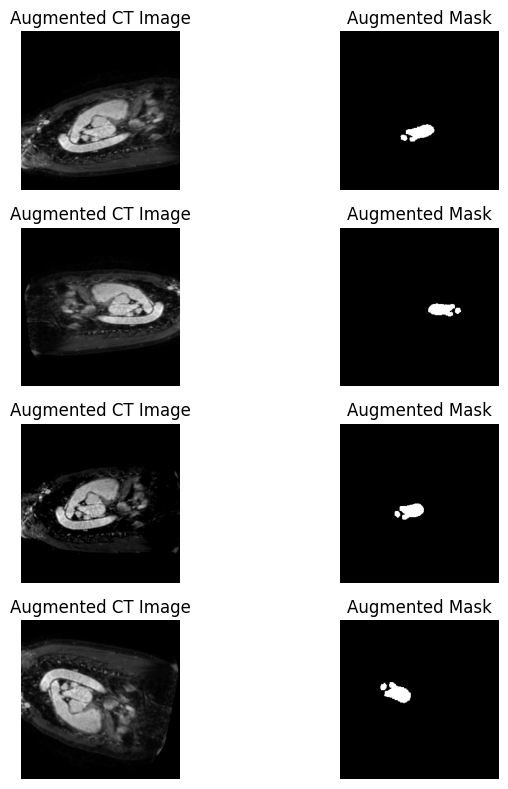

In [11]:
import matplotlib.pyplot as plt

# تعداد نمونه‌هایی که نمایش می‌دهیم
num_samples = 4  

# نمایش تصاویر و ماسک‌های `Augmented`
fig, axes = plt.subplots(num_samples, 2, figsize=(8, 8))

for i in range(num_samples):
    index = len(X_train) + i  # انتخاب تصاویر از داده‌های افزوده‌شده

    axes[i, 0].imshow(X_train_final[index, :, :, 0], cmap="gray")
    axes[i, 0].set_title("Augmented CT Image")
    axes[i, 0].axis("off")
    
    axes[i, 1].imshow(Y_train_final[index, :, :, 0], cmap="gray")
    axes[i, 1].set_title("Augmented Mask")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# تابع ساخت مدل U-Net
def build_unet(input_shape=(256, 256, 1)):
    inputs = layers.Input(input_shape)

    # Encoder (Downsampling)
    c1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(p1)
    c2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(p2)
    c3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(p3)
    c4 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation="relu", padding="same")(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation="relu", padding="same")(c5)

    # Decoder (Upsampling)
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding="same")(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(u6)
    c6 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same")(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(u7)
    c7 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(u8)
    c8 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(u9)
    c9 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(c9)

    outputs = layers.Conv2D(1, (1, 1), activation="sigmoid")(c9)

    model = Model(inputs, outputs)
    return model

# ساخت مدل
unet_model = build_unet()
unet_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# نمایش ساختار مدل
unet_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np

# تبدیل داده‌ها به NumPy
X_train = np.array(X_train, dtype=np.float32)
Y_train = np.array(Y_train, dtype=np.float32)

# تقسیم داده‌های `Train` به `Train` و `Test`
X_train_new, X_test, Y_train_new, Y_test = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42
)

# نمایش تعداد داده‌های جدید
print(f" داده‌های جدید تقسیم شدند:")
print(f" Train: {X_train_new.shape}, {Y_train_new.shape}")
print(f" Test: {X_test.shape}, {Y_test.shape}")


 داده‌های جدید تقسیم شدند:
 Train: (32, 256, 256, 1), (32, 256, 256, 1)
 Test: (8, 256, 256, 1), (8, 256, 256, 1)


In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# تنظیمات آموزش مدل
batch_size = 8
epochs = 20

# تعریف Callbacks برای جلوگیری از Overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss")

# آموزش مدل
history = unet_model.fit(
    X_train_new, Y_train_new,
    validation_data=(X_test, Y_test),  # ارزیابی روی Test
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint]
)

# ذخیره مدل جدید
unet_model.save("final_model.h5")
print(" مدل ذخیره شد: final_model.h5")


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9945 - loss: 0.0136 

4/4 ━━━━━━━━━━━━━━━━━━━━ 45s 12s/step - accuracy: 0.9944 - loss: 0.0138 - val_accuracy: 0.9933 - val_loss: 0.0166
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9937 - loss: 0.0147 

4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - accuracy: 0.9937 - loss: 0.0147 - val_accuracy: 0.9946 - val_loss: 0.0140
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 11s/step - accuracy: 0.9947 - loss: 0.0155 - val_accuracy: 0.9920 - val_loss: 0.0161
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.9934 - loss: 0.0158 - val_accuracy: 0.9941 - val_loss: 0.0168
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - accuracy: 0.9939 - loss: 0.0165 - val_accuracy: 0.9943 - val_loss: 0.0147
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9952 - loss: 0.0122 

4/4 ━━━━━━━━━━━━━━━━━━━━ 49s 13s/step - accuracy: 0.9952 - loss: 0.0122 - val_accuracy: 0.9949 - val_loss: 0.0121
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9954 - loss: 0.0111 

4/4 ━━━━━━━━━━━━━━━━━━━━ 49s 13s/step - accuracy: 0.9955 - loss: 0.0110 - val_accuracy: 0.9951 - val_loss: 0.0118
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9957 - loss: 0.0108 

4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 13s/step - accuracy: 0.9958 - loss: 0.0107 - val_accuracy: 0.9954 - val_loss: 0.0108
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 49s 12s/step - accuracy: 0.9963 - loss: 0.0092 - val_accuracy: 0.9945 - val_loss: 0.0167
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.9960 - loss: 0.0103 

4/4 ━━━━━━━━━━━━━━━━━━━━ 62s 17s/step - accuracy: 0.9960 - loss: 0.0102 - val_accuracy: 0.9960 - val_loss: 0.0104
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 74s 18s/step - accuracy: 0.9970 - loss: 0.0078 - val_accuracy: 0.9958 - val_loss: 0.0109
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9971 - loss: 0.0079 

4/4 ━━━━━━━━━━━━━━━━━━━━ 53s 13s/step - accuracy: 0.9971 - loss: 0.0078 - val_accuracy: 0.9963 - val_loss: 0.0100
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9976 - loss: 0.0061 

4/4 ━━━━━━━━━━━━━━━━━━━━ 49s 13s/step - accuracy: 0.9976 - loss: 0.0062 - val_accuracy: 0.9971 - val_loss: 0.0080
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 45s 11s/step - accuracy: 0.9977 - loss: 0.0063 - val_accuracy: 0.9967 - val_loss: 0.0084
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 46s 12s/step - accuracy: 0.9977 - loss: 0.0060 - val_accuracy: 0.9966 - val_loss: 0.0100
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - accuracy: 0.9977 - loss: 0.0057 - val_accuracy: 0.9970 - val_loss: 0.0090
Epoch 17/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - accuracy: 0.9979 - loss: 0.0055 - val_accuracy: 0.9970 - val_loss: 0.0086
Epoch 18/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - accuracy: 0.9979 - loss: 0.0053 - val_accuracy: 0.9963 - val_loss: 0.0100


 مدل ذخیره شد: final_model.h5


In [31]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# محاسبه Dice Score
def dice_score(y_true, y_pred):
    smooth = 1e-6
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (np.sum(y_true) + np.sum(y_pred) + smooth)

# محاسبه IoU (Intersection over Union)
def iou_score(y_true, y_pred):
    smooth = 1e-6
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return (intersection + smooth) / (union + smooth)

# پیش‌بینی روی داده‌های `Test`
predictions = unet_model.predict(X_test)

# اعمال Threshold برای تبدیل به مقادیر 0 و 1
threshold = 0.5
pred_masks = (predictions > threshold).astype(np.uint8)

# محاسبه متریک‌ها
dice_scores = []
iou_scores = []
precision_scores = []
recall_scores = []

for i in range(len(Y_test)):
    dice_scores.append(dice_score(Y_test[i, :, :, 0], pred_masks[i, :, :, 0]))
    iou_scores.append(iou_score(Y_test[i, :, :, 0], pred_masks[i, :, :, 0]))
    precision_scores.append(precision_score(Y_test[i, :, :, 0].flatten(), pred_masks[i, :, :, 0].flatten()))
    recall_scores.append(recall_score(Y_test[i, :, :, 0].flatten(), pred_masks[i, :, :, 0].flatten()))

# نمایش نتایج
print(f" **میانگین Dice Score:** {np.mean(dice_scores):.4f}")
print(f" **میانگین IoU:** {np.mean(iou_scores):.4f}")
print(f" **میانگین Precision:** {np.mean(precision_scores):.4f}")
print(f" **میانگین Recall:** {np.mean(recall_scores):.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
 **میانگین Dice Score:** 0.6767
 **میانگین IoU:** 0.5304
 **میانگین Precision:** 0.8118
 **میانگین Recall:** 0.5970


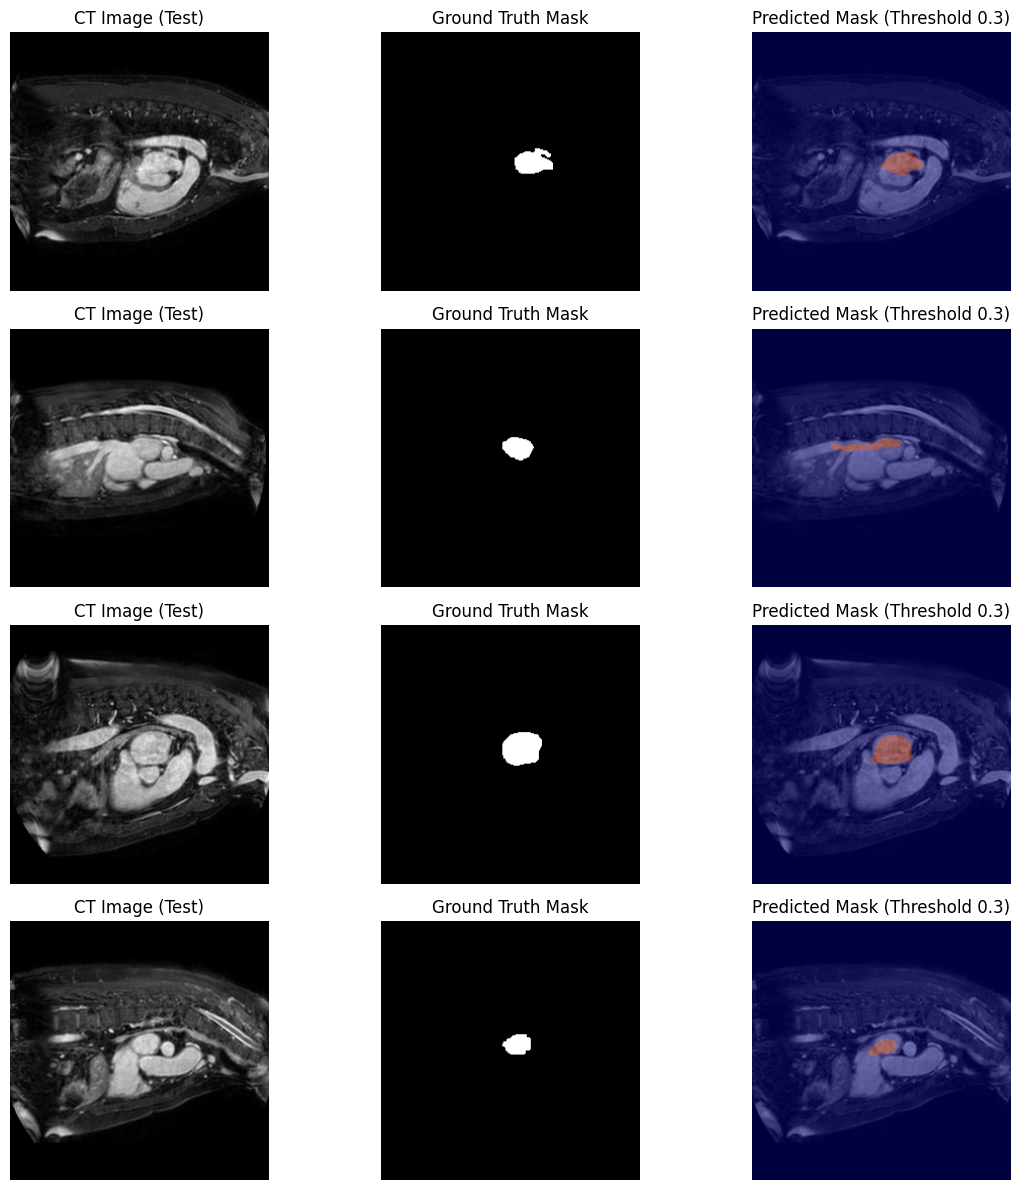

In [32]:
threshold = 0.3  

pred_masks = (predictions > threshold).astype(np.uint8)

# نمایش خروجی با Threshold 
fig, axes = plt.subplots(num_samples, 3, figsize=(12, 12))

for i in range(num_samples):
    axes[i, 0].imshow(X_test[i, :, :, 0], cmap="gray")
    axes[i, 0].set_title("CT Image (Test)")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(Y_test[i, :, :, 0], cmap="gray")
    axes[i, 1].set_title("Ground Truth Mask")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(X_test[i, :, :, 0], cmap="gray")
    axes[i, 2].imshow(pred_masks[i, :, :, 0], cmap="jet", alpha=0.5)
    axes[i, 2].set_title(f"Predicted Mask (Threshold {threshold})")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()


In [33]:
unet_model.save("final_unet_model.h5")
print(" مدل نهایی ذخیره شد!")


 مدل نهایی ذخیره شد!
